# Google Playstore 데이터 불러오기

In [381]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [382]:
import warnings
warnings.filterwarnings('ignore')

In [383]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/playstore/googleplaystore.csv')

In [384]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [385]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [386]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

변수 설명

*   App : 앱의 이름
*   Category : 앱의 카테고리 유형
* Rating : 앱의 평점
* Reviews : 앱의 리뷰 수
* SIze : 앱의 크기
* Installs : 앱의 설치 수 (Target)
* Type : 무료/유료 구분
* Content Rating : 사용가능 연령
* Genres : 앱의 장르, 카테고리와 비슷
* Last Updated : 최근 업데이트 날짜
* Current Ver : 최근 앱의 버전
* Android Ver : 안드로이드에서의 버전



# Data preprocessing 진행

Rating 변수 이외에 다른 변수들은 모두 Object 형인 것을 알 수 있다. 데이터 분석 및 머신러닝을 진행하기 위해 변수들을 수치화 시켜줘야한다.

# App
App 변수는 앱의 이름으로 target값과 연관을 짓기 어려움으로 삭제

In [387]:
data = data.drop(columns = 'App',axis=1)

# Category
Category 변수는 범주형 변수로서 One hot encoding 을 통하여 수치화 시켜준다.

In [388]:
category_list = data['Category'].unique()

In [389]:
dp = pd.get_dummies(data['Category'])

In [390]:
data = data.merge(dp, left_index=True,right_index=True)
data = data.drop(columns='Category',axis=1)

# Rating
Rating은 실수형이지만 Null값을 가지고 있으므로 이를 처리해야 한다.

In [391]:
data['Rating'].isna().sum()

1474

In [392]:
data[['Rating','Installs']].sort_values(by='Installs').head(10)

,Rating,Installs
9148,NaN,0
5486,NaN,0+
8614,NaN,0+
9337,NaN,0+
9719,NaN,0+
9917,NaN,0+
8871,NaN,0+
9905,NaN,0+
6692,NaN,0+
5307,NaN,0+


설치수가 0인 경우 App의 Rating 값이 없다는 것을 알 수 있다. <br>
Installs 수가 너무 없는 데이터는 제외하고 어느정도 설치가 되어있는 경우 Rating이 없는 것은 0으로 채워 준다.

In [393]:
data['Installs'] = data['Installs'].str.replace('+','')
data['Installs'] = data['Installs'].str.replace(',','')

In [394]:
# Installs 데이터에 컬럼과 일치하지 않는 데이터가 포함되어있는 행을 삭제
data[data['Installs'] == 'Free']

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,1.9,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
10472,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [395]:
data = data.drop(index=10472)

In [396]:
data['Installs'] = data['Installs'].astype(int)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

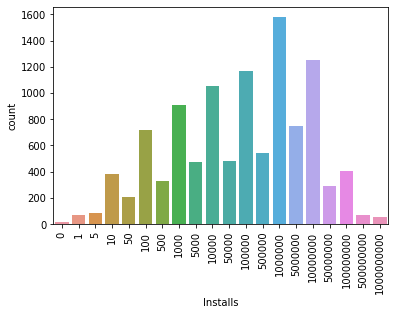

In [397]:
sns.countplot(data=data, x='Installs')
plt.xticks(rotation=90)

Installs가 5 이하인 경우에는 데이터수가 100개도 안되므로 의미있는 결과가 나타날거라고 보기우므로 삭제

In [398]:
indexlist = data[data['Installs']<=5].index

data = data.drop(index = indexlist)

In [399]:
data['Rating'] = data['Rating'].fillna(0)

In [400]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 0. , 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

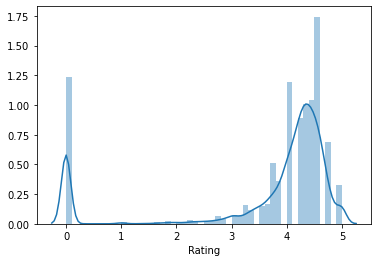

In [401]:
sns.distplot(data['Rating'])

# Reviews 

In [402]:
data['Reviews'].isna().sum()

0

In [403]:
data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [404]:
data['Reviews']=data['Reviews'].astype(int)

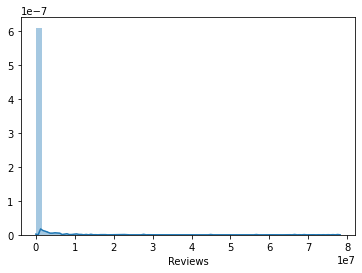

In [405]:
sns.distplot(data['Reviews'])

In [406]:
data.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,1.9,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Size
M = 1,000,000<br>
K = 1,000<br>

문자형을 숫자데이터로 변환시켜준다.

In [407]:
data['Size'][0] = data['Size'][0].replace('M','000000')
data['Size'][0]

'19000000'

In [408]:
index_list = data.index

In [409]:
for i in index_list:
  if '.' in data['Size'][i]:
    data['Size'][i] = data['Size'][i].replace('.','').replace('M','00000').replace('K','00').replace('k','00')
    
  else:
    data['Size'][i] = data['Size'][i].replace('M','000000').replace('K','000').replace('k','000')



In [410]:
data.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,1.9,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,4.1,159,19000000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [411]:
index_list = data[data['Size'] == 'Varies with device'].index

In [412]:
data = data.drop(index = index_list,axis=0)


In [413]:
data['Size'] = data['Size'].astype(int)

# Type

범주형 번수로서 one hot encoding 으로 변경해준다.

In [414]:

dp = pd.get_dummies(data['Type'])

data = data.merge(dp, left_index= True, right_index=True)

data = data.drop(columns = 'Type', axis=1)

In [415]:
data.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,1.9,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Free,Paid
0,4.1,159,19000000,10000,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3.9,967,14000000,500000,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,4.7,87510,8700000,5000000,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4.5,215644,25000000,50000000,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4.3,967,2800000,100000,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Price
$표시를 없앤후 float형 데이터로 변환

In [416]:
data['Price'].unique()

array(['0', '$4.99', '$6.99', '$1.49', '$2.99', '$3.99', '$7.99', '$5.99',
       '$1.99', '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99',
       '$11.99', '$79.99', '$16.99', '$14.99', '$1.00', '$29.99',
       '$12.99', '$3.49', '$10.99', '$7.49', '$1.50', '$19.99', '$15.99',
       '$33.99', '$74.99', '$39.99', '$2.49', '$4.49', '$1.70', '$2.00',
       '$3.88', '$25.99', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$1.59', '$6.49', '$1.29',
       '$5.00', '$299.99', '$379.99', '$37.99', '$18.99', '$389.99',
       '$19.90', '$8.49', '$1.75', '$14.00', '$4.85', '$46.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$15.46', '$8.99', '$3.04',
       '$13.99', '$4.29', '$2.60', '$3.28', '$4.60', '$2.90', '$1.97',
       '$89.99', '$2.56', '$3.61', '$1.26', '$1.20', '$1.04'],
      dtype=object)

In [417]:
data['Price'] = data['Price'].str.replace('$','')
data['Price'] = data['Price'].astype(float)

# Content Rating
번주형 변수로서 One hot encoding을 진행하여 수치형 데이터로 변환


In [418]:
dp = pd.get_dummies(data['Content Rating'])

data = data.merge(dp,left_index=True,right_index=True)

In [419]:
data = data.drop(columns ='Content Rating', axis=1)

# Genres
Category 와 매우 유사함으로 Genre 컬럼은 삭제

In [420]:
data = data.drop(columns='Genres', axis=1)

# LastUpdated
최근 업데이트 된 날짜로서 나중에 날짜데이터를 활용할 가능성이 있으므로 날짜형식으로 변환

In [421]:
from datetime import datetime

In [422]:
data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [423]:
date_list = []
for str in data['Last Updated']:
  s = datetime.strptime(str,"%B %d, %Y")
  date_list.append(s)


In [424]:
data['Last Updated'] = date_list

In [425]:
data.head()

,Rating,Reviews,Size,Installs,Price,Last Updated,Current Ver,Android Ver,1.9,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Free,Paid,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,4.1,159,19000000,10000,0.0,2018-01-07,1.0.0,4.0.3 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,3.9,967,14000000,500000,0.0,2018-01-15,2.0.0,4.0.3 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,4.7,87510,8700000,5000000,0.0,2018-08-01,1.2.4,4.0.3 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,4.5,215644,25000000,50000000,0.0,2018-06-08,Varies with device,4.2 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,4.3,967,2800000,100000,0.0,2018-06-20,1.1,4.4 and up,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


# Current Ver ,Android Ver
버젼은 App마다 update되는 형식이 다르고 이를 통하여 의미있는 피쳐엔지니어링을 하기 어렵다고 생각된다. 여기서는 없애고 사용


In [426]:
data = data.drop(columns=['Current Ver', 'Android Ver'], axis=1)

In [427]:
data.head()

,Rating,Reviews,Size,Installs,Price,Last Updated,1.9,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Free,Paid,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,4.1,159,19000000,10000,0.0,2018-01-07,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,3.9,967,14000000,500000,0.0,2018-01-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,4.7,87510,8700000,5000000,0.0,2018-08-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,4.5,215644,25000000,50000000,0.0,2018-06-08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,4.3,967,2800000,100000,0.0,2018-06-20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [428]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8989 entries, 0 to 10840
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Rating               8989 non-null   float64       
 1   Reviews              8989 non-null   int64         
 2   Size                 8989 non-null   int64         
 3   Installs             8989 non-null   int64         
 4   Price                8989 non-null   float64       
 5   Last Updated         8989 non-null   datetime64[ns]
 6   1.9                  8989 non-null   uint8         
 7   ART_AND_DESIGN       8989 non-null   uint8         
 8   AUTO_AND_VEHICLES    8989 non-null   uint8         
 9   BEAUTY               8989 non-null   uint8         
 10  BOOKS_AND_REFERENCE  8989 non-null   uint8         
 11  BUSINESS             8989 non-null   uint8         
 12  COMICS               8989 non-null   uint8         
 13  COMMUNICATION        8989 non-nu

# 베이스라인 모델링 구현

In [433]:
from sklearn.model_selection import train_test_split

target = data['Installs']
train = data.drop(columns = ['Installs','Last Updated'], axis=1)

train_x, test_x, train_y, test_y = train_test_split(train, target, random_state=10, test_size=0.3)

In [434]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 300, learning_rate=0.1, random_state=10)
xgb.fit(train_x,train_y)
prediction = xgb.predict(test_x)


[11:19:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [440]:
test_y

6693         5000
2917     10000000
9275         5000
9490       100000
10496         100
           ...   
8633      5000000
9898          100
1632       100000
9531          500
6534         5000
Name: Installs, Length: 2697, dtype: int64

In [447]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test_y,prediction)



148829644249412.6